一．问题背景

住房一直以来都是人们关心的热门话题，房价也是人们时时刻刻关心的热点。
虽然新房子更加上档次，但是二手房有着现房交易，地段较好，配套设施完善，选择面更加广泛等优势，因此二手房越来越受到广大消费者的青睐。
根据现有二手房的地段、装修等属性预估该二手房的价格也是买卖双方所关心的问题。因此通过现有数据，分析并且预测二手房的价格是一项有意义的研究课题。

（一）区域二手房均价分析

根据附件中的数据集，将二手房数据按照“区域”属性进行划分，然后计算每个区域的二手房均价，最后将区域及对应的房屋均价信息通过纵向条形图显示。

In [1266]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
import pandas as pd
import seaborn as sns
from pylab import mpl, plt

# best font and style settings for notebook
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = '微软雅黑'

In [1267]:
df = pd.read_csv("dataset/data.csv", index_col=0)
df_copy = pd.read_csv("dataset/data.csv", index_col=0)
data = df.copy()

In [1268]:
df.describe()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
count,2551,2551,2551,2551,2551,2551,2551,2551,2551
unique,675,436,46,968,1852,11,3,6,9
top,亚泰梧桐公馆,105万,2室2厅1卫,90平米,10000元/平米,南北,中层,精装修,二道
freq,45,49,953,64,29,2033,1050,1602,490


In [1269]:
df.head()

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新
1,桦林苑,99.8万,3室2厅1卫,143平米,6979元/平米,南北,中层,毛坯,净月
2,嘉柏湾,32万,1室1厅1卫,43.3平米,7390元/平米,南,高层,精装修,经开
3,中环12区,51.5万,2室1厅1卫,57平米,9035元/平米,南北,高层,精装修,南关
4,昊源高格蓝湾,210万,3室2厅2卫,160.8平米,13060元/平米,南北,高层,精装修,二道


二．解决问题

1.全市二手房数据分析

（一）区域二手房均价分析

根据附件中的数据集，将二手房数据按照“区域”属性进行划分，然后计算每个区域的二手房均价，最后将区域及对应的房屋均价信息通过纵向条形图显示。



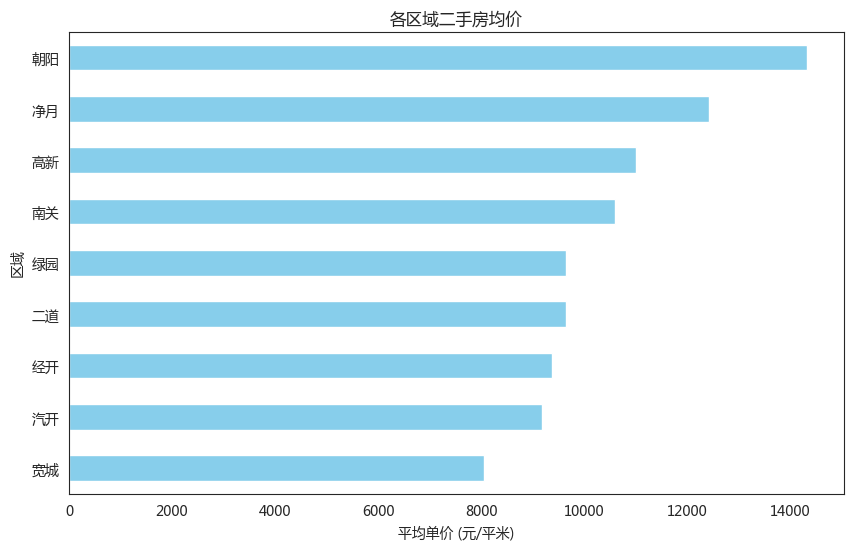

In [1270]:
# 数据预处理，去掉‘万’和‘元/平米’，将其转换为数值型数据
data['总价'] = data['总价'].str.replace('万', '').astype(np.float16)
data['单价'] = data['单价'].str.replace('元/平米', '').astype(np.float16)

# 按区域分组，计算均价
region_avg_price = data.groupby('区域')['单价'].mean().sort_values()

# 绘制纵向条形图
region_avg_price.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('平均单价 (元/平米)')
plt.ylabel('区域')
plt.title('各区域二手房均价')
plt.show()

（二）区域二手房数据及占比分析

根据附件的数据集，计算各个区域二手房数量占总二手房数量的百分比，并画出饼状图。



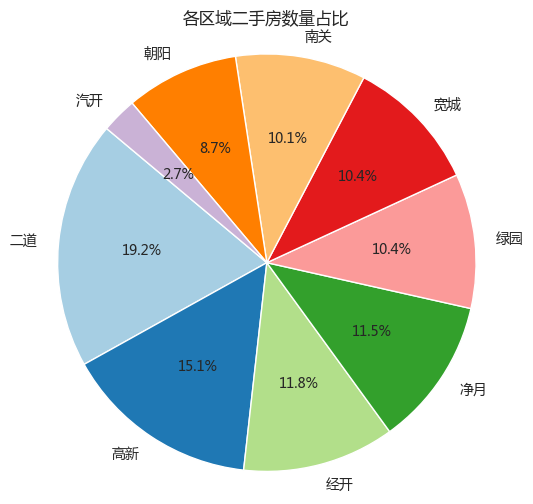

In [1271]:
# 计算各区域二手房数量占比
region_counts = data['区域'].value_counts(normalize=True) * 100

# 绘制饼状图
plt.figure(figsize=(6, 6))
region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(region_counts))))
plt.ylabel('')
plt.title('各区域二手房数量占比')
plt.axis('equal')
plt.show()


（三）二手房装修程度分析

将二手房按照“装修”属性进行划分，然后计算不同装修程度的二手房数量，并用条形图显示不同装修程度二手房的数量。



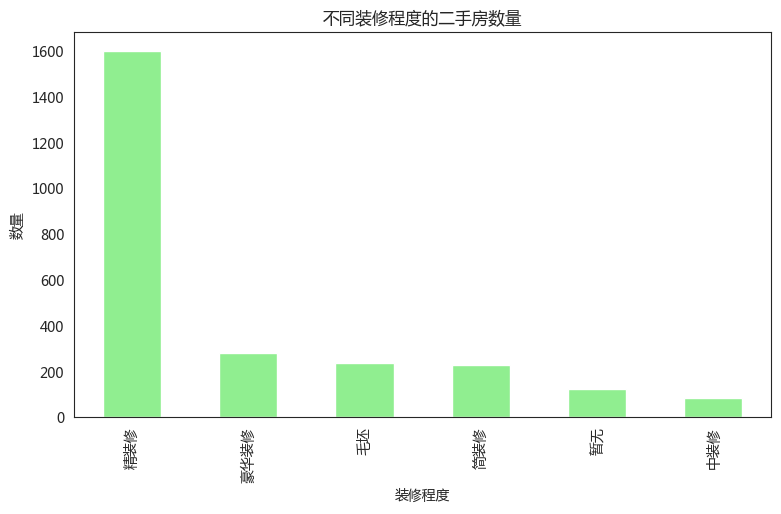

In [1272]:
# 计算不同装修程度二手房数量
decoration_counts = data['装修'].value_counts()

# 绘制条形图
decoration_counts.plot(kind='bar', figsize=(9, 5), color='lightgreen')
plt.xlabel('装修程度')
plt.ylabel('数量')
plt.title('不同装修程度的二手房数量')
plt.show()


2.二手房房价预测

（一）将二手房按照户型进行分组，然后提取前5组最热门的二手房户型（出售数量最多的5组户型），最后计算这5个热门户型的均价并画图显示。


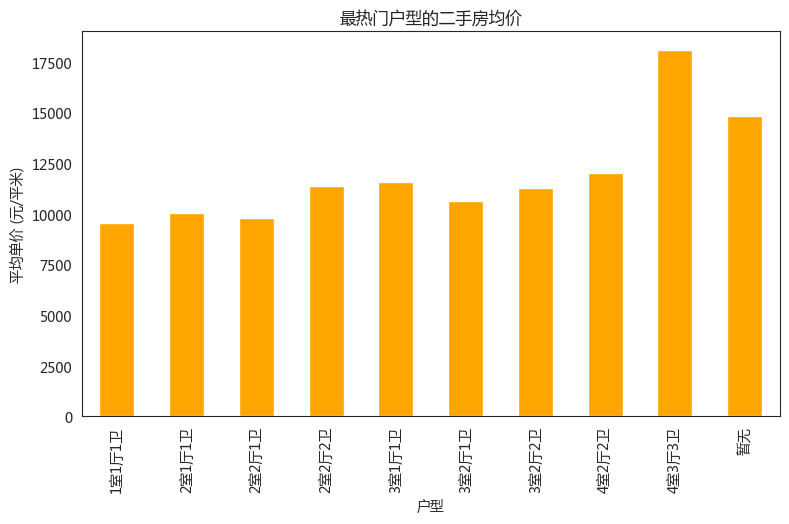

In [1273]:
# 按户型分组，计算各户型的数量
top_5_housetypes = data['户型'].value_counts().head(10).index

# 计算这5个热门户型的均价
top_5_avg_price = data[data['户型'].isin(top_5_housetypes)].groupby('户型')['单价'].mean()

# 绘制条形图
top_5_avg_price.plot(kind='bar', figsize=(9, 5), color='orange')
plt.xlabel('户型')
plt.ylabel('平均单价 (元/平米)')
plt.title('最热门户型的二手房均价')
plt.show()



（二）选择附件中适合的属性，建立模型预测二手房的价格。

In [1274]:
# 将户型拆分为‘室’、‘厅’、‘卫’
housetype_split = data['户型'].str.extract(r'(\d+)室(\d+)厅(\d+)卫')
housetype_split = housetype_split.fillna(0).astype(int)
data[['室', '厅', '卫']] = housetype_split
data["建筑面积"] = data['建筑面积'].str.replace("平米", "").astype(np.float16)
data['总价'] *= 10000
data

,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域,室,厅,卫
0,中天北湾新城,890000.0,2室2厅1卫,89.0000,10000.0,南北,低层,毛坯,高新,2,2,1
1,桦林苑,998125.0,3室2厅1卫,143.0000,6980.0,南北,中层,毛坯,净月,3,2,1
2,嘉柏湾,320000.0,1室1厅1卫,43.3125,7392.0,南,高层,精装修,经开,1,1,1
3,中环12区,515000.0,2室1厅1卫,57.0000,9032.0,南北,高层,精装修,南关,2,1,1
4,昊源高格蓝湾,2100000.0,3室2厅2卫,160.7500,13056.0,南北,高层,精装修,二道,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
57,园丁花园,1150000.0,3室2厅2卫,154.0000,7472.0,南北,低层,精装修,净月,3,2,2
58,枫林园,998125.0,2室2厅1卫,91.3125,10928.0,南北,中层,精装修,二道,2,2,1
59,经开四区,750000.0,2室2厅1卫,110.0000,6816.0,南北,中层,精装修,经开,2,2,1
0,华盛碧水云天,1000000.0,2室2厅1卫,109.7500,9112.0,南北,中层,精装修,汽开,2,2,1


In [1275]:
data_quant = data.drop(columns=['户型'])
data_quant = data_quant.dropna()
data_quant

,小区名字,总价,建筑面积,单价,朝向,楼层,装修,区域,室,厅,卫
0,中天北湾新城,890000.0,89.0000,10000.0,南北,低层,毛坯,高新,2,2,1
1,桦林苑,998125.0,143.0000,6980.0,南北,中层,毛坯,净月,3,2,1
2,嘉柏湾,320000.0,43.3125,7392.0,南,高层,精装修,经开,1,1,1
3,中环12区,515000.0,57.0000,9032.0,南北,高层,精装修,南关,2,1,1
4,昊源高格蓝湾,2100000.0,160.7500,13056.0,南北,高层,精装修,二道,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
57,园丁花园,1150000.0,154.0000,7472.0,南北,低层,精装修,净月,3,2,2
58,枫林园,998125.0,91.3125,10928.0,南北,中层,精装修,二道,2,2,1
59,经开四区,750000.0,110.0000,6816.0,南北,中层,精装修,经开,2,2,1
0,华盛碧水云天,1000000.0,109.7500,9112.0,南北,中层,精装修,汽开,2,2,1


In [1276]:
# 特征工程，进行one-hot编码
data_quant = pd.get_dummies(data_quant,
                            columns=['朝向', '楼层', '装修', '区域'],
                            drop_first=True)
print(data_quant.columns)
data_quant

Index(['小区名字', '总价', '建筑面积', '单价', '室', '厅', '卫', '朝向_东北', '朝向_东南', '朝向_东西',
       '朝向_北', '朝向_南', '朝向_南北', '朝向_暂无', '朝向_西', '朝向_西北', '朝向_西南', '楼层_低层',
       '楼层_高层', '装修_暂无', '装修_毛坯', '装修_简装修', '装修_精装修', '装修_豪华装修', '区域_净月',
       '区域_南关', '区域_宽城', '区域_朝阳', '区域_汽开', '区域_经开', '区域_绿园', '区域_高新'],
      dtype='object')


,小区名字,总价,建筑面积,单价,室,厅,卫,朝向_东北,朝向_东南,朝向_东西,...,装修_精装修,装修_豪华装修,区域_净月,区域_南关,区域_宽城,区域_朝阳,区域_汽开,区域_经开,区域_绿园,区域_高新
0,中天北湾新城,890000.0,89.0000,10000.0,2,2,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,桦林苑,998125.0,143.0000,6980.0,3,2,1,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,嘉柏湾,320000.0,43.3125,7392.0,1,1,1,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,中环12区,515000.0,57.0000,9032.0,2,1,1,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,昊源高格蓝湾,2100000.0,160.7500,13056.0,3,2,2,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,园丁花园,1150000.0,154.0000,7472.0,3,2,2,False,False,False,...,True,False,True,False,False,False,False,False,False,False
58,枫林园,998125.0,91.3125,10928.0,2,2,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
59,经开四区,750000.0,110.0000,6816.0,2,2,1,False,False,False,...,True,False,False,False,False,False,False,True,False,False
0,华盛碧水云天,1000000.0,109.7500,9112.0,2,2,1,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [1277]:
data_quant.columns

Index(['小区名字', '总价', '建筑面积', '单价', '室', '厅', '卫', '朝向_东北', '朝向_东南', '朝向_东西',
       '朝向_北', '朝向_南', '朝向_南北', '朝向_暂无', '朝向_西', '朝向_西北', '朝向_西南', '楼层_低层',
       '楼层_高层', '装修_暂无', '装修_毛坯', '装修_简装修', '装修_精装修', '装修_豪华装修', '区域_净月',
       '区域_南关', '区域_宽城', '区域_朝阳', '区域_汽开', '区域_经开', '区域_绿园', '区域_高新'],
      dtype='object')

In [1278]:
# 提取特征和目标变量
features = data_quant.copy()

In [1279]:
features = features.dropna()
target_unit_price = features['单价'].copy()
target_total_price = features['总价'].copy()
features = features.drop(columns=['单价', '总价', '小区名字', '建筑面积'])

In [1280]:
features.columns

Index(['室', '厅', '卫', '朝向_东北', '朝向_东南', '朝向_东西', '朝向_北', '朝向_南', '朝向_南北',
       '朝向_暂无', '朝向_西', '朝向_西北', '朝向_西南', '楼层_低层', '楼层_高层', '装修_暂无', '装修_毛坯',
       '装修_简装修', '装修_精装修', '装修_豪华装修', '区域_净月', '区域_南关', '区域_宽城', '区域_朝阳',
       '区域_汽开', '区域_经开', '区域_绿园', '区域_高新'],
      dtype='object')

In [1281]:
# 分割数据集为训练集和测试集

X_train_unit, X_test_unit, y_train_unit, y_test_unit = train_test_split(
    features, target_unit_price, test_size=0.2, random_state=42)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(
    features, target_total_price, test_size=0.2, random_state=42)


In [1282]:
from sklearn.linear_model import LinearRegression

li = LinearRegression()
# 拟合数据
li.fit(X_train_unit, y_train_unit)


df_result = pd.DataFrame([list(li.predict(X_test_unit)), y_test_unit]).T
df_result[2] = (1 - (df_result[0] / df_result[1]))**2
df_result[3] = df_result[0] / df_result[1]
df_result[4] = df_result[1] / df_result[0]
df_result[5] = np.max([df_result[3], df_result[4]],axis=0)
df_result.mean()

0    10444.276603
1    10427.780822
2        0.091912
3        1.066741
4        0.999816
5        1.227557
dtype: float64

In [1283]:
li = LinearRegression()
# 拟合数据
li.fit(X_train_total, y_train_total)
df_result = pd.DataFrame([list(li.predict(X_test_total)), y_test_total]).T
df_result[2] = (1 - (df_result[0] / df_result[1]))**2
df_result[3] = df_result[0] / df_result[1]
df_result[4] = df_result[1] / df_result[0]
df_result[5] = np.max([df_result[3], df_result[4]], axis=0)
df_result.mean()

0    1.091741e+06
1    1.129259e+06
2    1.786713e-01
3    1.058368e+00
4    1.019416e+00
5    1.323347e+00
dtype: float64

In [1284]:
df_result

,0,1,2,3,4,5
0,406135.249667,364062.5,0.013355,1.115565,0.896407,1.115565
1,691283.448016,698125.0,0.000096,0.990200,1.009897,1.009897
2,250415.483411,130000.0,0.857982,1.926273,0.519137,1.926273
3,824317.870453,990000.0,0.028008,0.832644,1.200993,1.200993
4,578331.260403,650000.0,0.012157,0.889740,1.123923,1.123923
...,...,...,...,...,...,...
506,562145.822825,450000.0,0.062107,1.249213,0.800504,1.249213
507,555005.747061,660000.0,0.025307,0.840918,1.189177,1.189177
508,570875.706999,620000.0,0.006278,0.920767,1.086051,1.086051
509,691283.448016,850000.0,0.034866,0.813275,1.229597,1.229597


In [2]:
!jupyter nbconvert --to html demo-2-2.ipynb

[NbConvertApp] Converting notebook demo-2-2.ipynb to html
[NbConvertApp] Writing 496772 bytes to demo-2-2.html
